# Proyek Analisis Data: Bike Sharing
- **Nama:** Nurainiyah Solehan
- **Email:** nurainiyasoleha9@gmail.com
- **ID Dicoding:** nurainiyah_solehan

## Menentukan Pertanyaan Bisnis

- Bagaimana tren peminjaman sepeda pada tahun 2011?
- Bagaimana pola peminjaman sepeda berdasarkan kategori cuaca (weathersit)?
- Bagaimana perbandingan jumlah peminjaman sepeda pada hari kerja dan bukan kerja?

## Import Semua Packages/Library yang Digunakan

In [161]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [162]:
df = pd.read_csv('day.csv')
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


**Insight:**

Dataset yang digunakan dalam analisis ini adalah Bike Sharing yang berisi informasi terkait jumlah peminjaman sepeda berdasarkan berbagai faktor, seperti waktu, cuaca, dan kategori pengguna.
Dalam folder dataset, terdapat dua file yaitu:
- day.csv : Data peminjaman sepeda dengan agregasi harian.
- hour.csv : Data peminjaman sepeda dengan agregasi per jam.

Namun, dalam analisis ini, saya hanya menggunakan dataset day.csv, yang berisi data harian dan memberikan gambaran lebih luas tentang tren penggunaan sepeda tanpa melihat fluktuasi setiap jam.

### Assessing Data

In [163]:
# Melihat informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [164]:
# Mendeskripsi isi dataset
df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [165]:
# Mengecek nilai yang hilang
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [166]:
# Mengecek duplikat data
df.duplicated().sum()

0

**Insight:**

Setelah melakukan evaluasi terhadap dataset, ditemukan bahwa dataset day.csv terdiri dari 731 record dengan total 16 kolom.
Berdasarkan analisis didapatkan bahwa:
- Semua kolom memiliki tipe data yang sesuai, kecuali dteday, yang masih bertipe object dan seharusnya dikonversi ke datetime.
- Hasil deskripsi statistik tidak menunjukkan adanya keanehan dalam data.
- Tidak ditemukan nilai yang hilang maupun data duplikat dalam dataset.

### Cleaning Data

In [167]:
ddf = df.copy()

In [168]:
# Mengganti tipe data kolom dteday
ddf['dteday'] = pd.to_datetime(ddf['dteday'])

In [169]:
# Mengecek kembali info data
ddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**

Kolom dteday, yang sebelumnya bertipe object, dikonversi ke format datetime menggunakan fungsi pd.to_datetime(). Setelah proses konversi, pengecekan ulang dengan df.info() menunjukkan bahwa tipe data kolom tersebut telah berubah menjadi datetime, sehingga siap digunakan untuk analisis berbasis waktu dengan lebih akurat.

## Exploratory Data Analysis (EDA)

### Explore Dataset Day

In [170]:
# Korelasi antar variabel
correlation_matrix = ddf.corr()
correlation_matrix

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
dteday,1.000000,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494


**Insight:**

- Tingkat registrasi (registered) memiliki korelasi tinggi terhadap total penyewaan sepeda (cnt) sebesar 0.95. Ini menunjukkan bahwa sebagian besar pengguna adalah pelanggan terdaftar, bukan penyewa kasual.
- Suhu (temp dan atemp) berkorelasi positif dengan penyewaan sepeda (0.63). Artinya, semakin hangat suhu udara, semakin banyak orang yang menyewa sepeda.
- Cuaca (weathersit) berkorelasi negatif dengan penyewaan sepeda (-0.30). Kondisi cuaca buruk (hujan, salju, kabut) mengurangi jumlah penyewaan.
- Musim (season) berkorelasi positif dengan penyewaan sepeda (0.41). Ini berarti ada tren musiman dalam jumlah penyewaan, kemungkinan meningkat di musim semi dan panas.
- Tahun (yr) juga memiliki korelasi positif dengan jumlah penyewaan (0.57), menunjukkan bahwa tren penyewaan meningkat dari tahun ke tahun.

In [171]:
# Pivot tabel untuk melihat rata-rata peminjaman berdasarkan bulan dan jam
pivot_mnth_hr = ddf.pivot_table(index='mnth', columns='weekday', values='cnt', aggfunc='mean')
pivot_mnth_hr

weekday,0,1,2,3,4,5,6
mnth,,,,,,,
1,1815.900000,1926.800000,2567.777778,2138.625000,2513.250000,2446.500000,1956.555556
2,2247.500000,2604.375000,2824.000000,2813.333333,2878.500000,2933.125000,2266.500000
3,3301.000000,3545.625000,3574.000000,3670.000000,3817.000000,3925.777778,3938.777778
4,4416.888889,4515.777778,4555.875000,4330.875000,4764.000000,4387.000000,4445.666667
5,5320.222222,4512.333333,5025.000000,5119.222222,5892.666667,5751.000000,5978.500000
6,5940.375000,5478.250000,5680.875000,5701.000000,5621.777778,5616.333333,6343.777778
7,5298.100000,5791.555556,5844.222222,5814.000000,5623.625000,5405.888889,5232.333333
8,4703.000000,5518.333333,5930.444444,6076.900000,6038.333333,5958.444444,5223.875000
9,6159.555556,5637.125000,5184.500000,5668.250000,5485.555556,5747.000000,6393.666667


**Insight:**

- Puncak Penyewaan terjadi pada Mei–September, dengan Juni sebagai bulan tertinggi (6.343 penyewaan/hari). Januari–Februari memiliki penyewaan terendah.
- Akhir pekan (Sabtu/Minggu) lebih ramai dibanding hari kerja, terutama di bulan-bulan dengan cuaca hangat.
- Hari kerja lebih stabil, kemungkinan didominasi pengguna rutin seperti pekerja/karyawan.
- Strategi: Tambah sepeda di musim panas & akhir pekan, buat promo di hari kerja saat musim dingin.

In [172]:
# Analisis hubungan cuaca dan peminjaman sepeda
weather_impact = ddf.groupby('weathersit')['cnt'].describe()
weather_impact


,count,mean,std,min,25%,50%,75%,max
weathersit,,,,,,,,
1,463.0,4876.786177,1879.483989,431.0,3636.5,4844.0,6458.5,8714.0
2,247.0,4035.862348,1809.109918,605.0,2674.5,4040.0,5257.5,8362.0
3,21.0,1803.285714,1240.284449,22.0,705.0,1817.0,2424.0,4639.0


**Insight:**

- Cuaca terbaik (weathersit = 1, cerah/berawan ringan) memiliki rata-rata penyewaan tertinggi (4.876 sepeda/hari), dengan puncak hingga 8.714 sepeda/hari.
- Cuaca sedang (weathersit = 2, mendung/gerimis ringan) menurunkan penyewaan (4.035 sepeda/hari), dengan puncak lebih rendah (8.362 sepeda/hari).
- Cuaca buruk (weathersit = 3, hujan/salju ringan) memiliki penyewaan terendah (1.803 sepeda/hari), dengan puncak jauh lebih rendah (4.639 sepeda/hari).

In [173]:
# Analisis peminjaman sepeda pada workingday 
count_comparison = ddf.groupby('workingday')['cnt'].sum()
count_comparison

workingday
0    1000269
1    2292410
Name: cnt, dtype: int64

**Insight:**

- Hari kerja (workingday = 1) memiliki total penyewaan lebih tinggi (2.292.410) dibandingkan hari libur (workingday = 0) yang hanya 1.000.269.
- Penyewaan lebih tinggi pada hari kerja, kemungkinan besar karena penggunaan oleh pekerja/karyawan untuk transportasi.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren peminjaman sepeda pada tahun 2011?

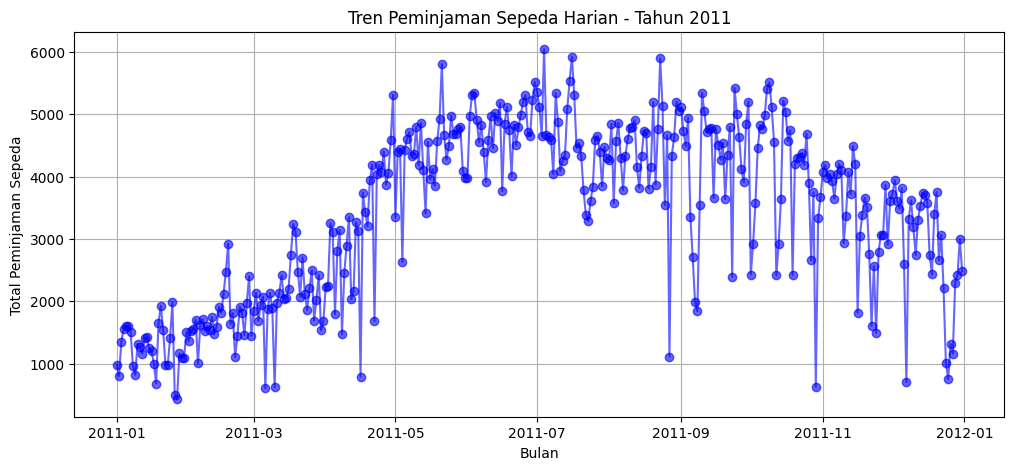

In [180]:
# Plot tren jumlah peminjaman sepeda sepanjang tahun 2011
ddf_2011 = ddf[ddf['dteday'].dt.year == 2011]

plt.figure(figsize=(12, 5))
plt.plot(ddf_2011['dteday'], ddf_2011['cnt'], marker='o', linestyle='-', color='b', alpha=0.6)
plt.xlabel('Bulan')
plt.ylabel('Total Peminjaman Sepeda')
plt.title('Tren Peminjaman Sepeda Harian - Tahun 2011')
plt.grid(True)
plt.show()

**Insight:**

- Terlihat bahwa jumlah peminjaman sepeda mengalami peningkatan bertahap dari Januari hingga pertengahan tahun (Juli-Agustus).
- Peminjaman mencapai puncaknya sekitar bulan Juni-Juli, dengan beberapa titik peminjaman di atas 6000.
- Setelah Agustus, peminjaman mulai menurun secara bertahap, dengan penurunan yang lebih tajam menjelang akhir tahun (November-Desember).

### Pertanyaan 2: Bagaimana pola peminjaman sepeda berdasarkan kategori cuaca (weathersit)?

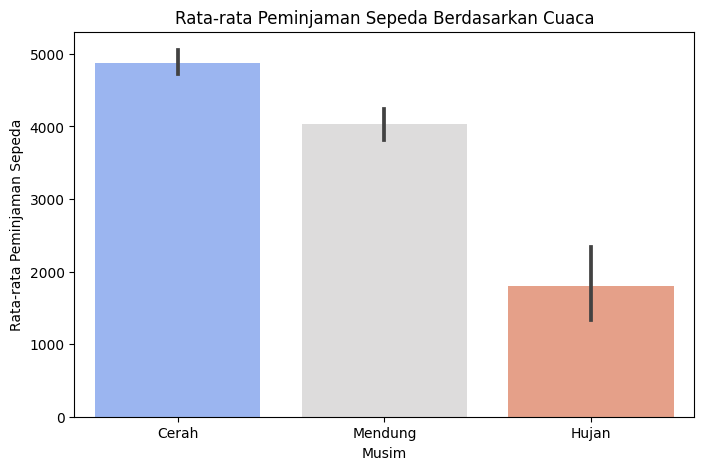

In [175]:
# Visualisasi rata-rata peminjaman berdasarkan cuaca
plt.figure(figsize=(8,5))
sns.barplot(x='weathersit', y='cnt', data=ddf, palette='coolwarm')

plt.xlabel('Musim')
plt.ylabel('Rata-rata Peminjaman Sepeda')
plt.title('Rata-rata Peminjaman Sepeda Berdasarkan Cuaca')
plt.xticks(ticks=[0,1,2], labels=['Cerah', 'Mendung', 'Hujan'])
plt.show()


**Insight:**

- Cuaca Cerah memiliki jumlah peminjaman sepeda tertinggi, dengan rata-rata mendekati 5000 peminjaman per hari. Pada hari cerah, pengguna lebih banyak memanfaatkan sepeda, mungkin karena kondisi lebih nyaman untuk bersepeda.
- Cuaca Mendung memiliki jumlah peminjaman yang lebih rendah dibandingkan cuaca cerah, sekitar 4000 peminjaman per hari. Pada hari mendung, masih ada peminjaman yang cukup tinggi, tetapi lebih rendah dari hari cerah, kemungkinan karena kekhawatiran akan hujan.
- Cuaca Hujan memiliki jumlah peminjaman terendah, kurang dari 2500 peminjaman per hari, dengan fluktuasi yang lebih besar (terlihat dari garis error bar yang lebih panjang). Pada hari hujan, peminjaman turun drastis, yang bisa disebabkan oleh kenyamanan dan keamanan yang lebih rendah saat bersepeda dalam kondisi basah.

### Pertanyaan 3: Bagaimana perbandingan jumlah peminjaman sepeda pada hari kerja dan bukan kerja?

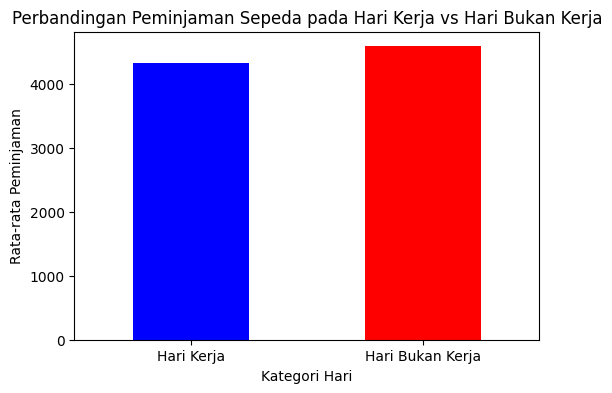

In [176]:
# Agregasi berdasarkan hari kerja
ddf_holiday = ddf.groupby('workingday')['cnt'].mean()

# Visualisasi
plt.figure(figsize=(6,4))
ddf_holiday.plot(kind='bar', color=['blue', 'red'])

plt.xticks(ticks=[0,1], labels=['Hari Kerja', 'Hari Bukan Kerja'], rotation=0)
plt.xlabel('Kategori Hari')
plt.ylabel('Rata-rata Peminjaman')
plt.title('Perbandingan Peminjaman Sepeda pada Hari Kerja vs Hari Bukan Kerja')
plt.show()


**Insight:**
- Hari Bukan Kerja memiliki jumlah peminjaman sepeda yang lebih tinggi dibandingkan Hari Kerja.
- Rata-rata peminjaman sepeda pada hari kerja berkisar 4200 - 4400 peminjaman per hari.
- Rata-rata peminjaman sepeda pada hari bukan kerja sedikit lebih tinggi, sekitar 4500 - 4700 peminjaman per hari.
- Peningkatan peminjaman pada hari bukan kerja bisa disebabkan karena orang lebih banyak menggunakan sepeda untuk aktivitas rekreasi dan santai saat akhir pekan.
- Hari kerja tetap memiliki jumlah peminjaman yang tinggi, yang kemungkinan besar berasal dari pengguna yang memakai sepeda untuk keperluan komuter (perjalanan ke tempat kerja/sekolah).

## Conclusion

- Conclution pertanyaan 1: Jumlah peminjaman sepeda cenderung meningkat pada musim semi dan panas, dengan puncak di pertengahan tahun dan penurunan di musim gugur serta musim dingin. Selain itu, ada perubahan besar antarhari, yang bisa dipengaruhi oleh cuaca, hari kerja, atau kondisi lainnya. Untuk meningkatkan pemakaian sepeda, maka dapat dipertimbangkan promosi atau program diskon saat musim dingin untuk mengurangi dampak penurunan peminjaman.

- Conclution pertanyaan 2: Cuaca berpengaruh besar terhadap jumlah peminjaman sepeda. Hari cerah adalah hari dengan peminjaman terbanyak, sedangkan hujan mengurangi peminjaman secara drastis.Hari mendung masih memiliki peminjaman yang cukup tinggi, menunjukkan bahwa banyak pengguna tetap menggunakan sepeda meskipun cuaca tidak optimal. Strategi optimalisasi dapat dilakukan dengan promosi atau insentif pada hari hujan, misalnya dengan memberikan diskon atau layanan tambahan bagi pengguna agar tetap tertarik menggunakan sepeda dalam kondisi cuaca yang kurang ideal.

- Conclution pertanyaan 3: Peminjaman sepeda lebih tinggi di hari bukan kerja dibandingkan hari kerja, yang menunjukkan bahwa banyak pengguna mengandalkan sepeda sebagai sarana rekreasi atau aktivitas di luar pekerjaan. Hari kerja masih memiliki peminjaman yang signifikan, menandakan bahwa sepeda juga digunakan sebagai transportasi harian. Strategi optimalisasi dapat dilakukan berdasarkan tren ini dengan meningkatkan promosi atau diskon pada akhir pekan untuk menarik lebih banyak pengguna rekreasi. Selain itu, menyediakan layanan atau jalur khusus untuk pengguna komuter di hari kerja, seperti jalur aman dan parkir khusus sepeda.

In [177]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa